In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os

os.environ['USE_PYGEOS']='0'

# Display all columns in the df
pd.set_option('display.max_columns', None)
# Set the float format to display numbers in standard decimal notation
pd.options.display.float_format = '{:.5f}'.format

c:\Users\anton\anaconda3\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\anton\AppData\Local\Temp/ipykernel_20392/595501156.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/l

In [2]:
#Read dataset
df=pd.read_csv(r"C:\Users\anton\Desktop\Master-Oppgave\Anton\Kode\Statistics\Code\graph_w_CS_and_volume_wCorrectLength.csv")

In [3]:
df.head()
# df=df.drop(["Unnamed: 0"], axis=1)
# print(df.columns)

,u,v,length,traffic_id,volume,Name,CS_id,geometry,Level,PowerKW_list,Number_Of_Chargers,1,2,3,4,5,6,7,8,9,10,11,12
0,794436,735703,11865.76308,59192V1878201,34276,Frydenlund P-hus,243271,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22....",15,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000
1,794436,735703,11865.76308,59192V1878201,34276,Tjuvholmen Parkering,215792,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22....",15,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000
2,794436,735703,11865.76308,59192V1878201,34276,"Recharge Filipstad, Oslo",243223,LINESTRING (10.733792828475945 59.909993840978...,3,"[50.0, 150.0, 50.0, 150.0, 50.0, 150.0, 50.0, ...",16,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000
3,794436,735703,11865.76308,59192V1878201,34276,Recharge K89,243329,LINESTRING (10.733792828475945 59.909993840978...,3,"[50.0, 50.0, 50.0, 50.0, 22.0, 22.0, 22.0, 22....",11,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000
4,794436,735703,11865.76308,59192V1878201,34276,Idas vei,173544,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]",8,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000


In [4]:
#Adding range of vehicles, lot of analysis to be done here (can also create custom ranges for for different regions...)
df["range"]=300

### Metrics derived from mean temperature of primary cities from all regions of Norway from every month of the year. Mean temp multiplied by loss factor 

In [5]:
#Creating dictionairy showcasing the loss of range per season 
temp_cost={'january':0.8, 
           'february':0.8, 
           'march':0.8, 
           'april':0.9, 
           'may':1, 
           'june':1.05, 
           'july':1.1, 
           'august':1.1, 
           'september':1.02, 
           'october':0.92, 
           'november':0.82, 
           'december':0.8} 

#Methodology for finding actual range of EV's can be improved. Take into account battery aging, and recommended charging to 80% (actual percentage can be researched)

In [6]:
#Removing this for now, might have misunderstood the calculation of actual length. Instead of adjusting range, we adjust length of edge
#Part of Method 1
for key in temp_cost.keys():
   df.loc[:, f'actual_range_{key[:3].lower()}'] = df['range'] * temp_cost[key]


In [7]:
# Loop through each month in the temp_cost dictionary

#Requirement for Method 2:
# for month in temp_cost.keys():
#     # Create a new column name for the actual length
#     col_name = f"actual_length_{month[:3].lower()}"
#     # Calculate the actual length using the corresponding factor from the dictionary
#     df[col_name] = df['length'] * temp_cost[month]


In [8]:
# Define a dictionary to map the old column names to the new column names

col_map = {i: f"vol_{month[:3].lower().strip()}" for i, month in zip(range(1, 13), temp_cost.keys())}

# Manually change the column names
new_names = {'1': 'vol_jan', '2': 'vol_feb', '3': 'vol_mar', '4': 'vol_apr', '5': 'vol_may', '6': 'vol_jun', '7': 'vol_jul', '8': 'vol_aug', '9': 'vol_sep', '10': 'vol_oct', '11': 'vol_nov', '12': 'vol_dec'}

# Rename the columns using the dictionary
df = df.rename(columns=new_names)




In [9]:
#Fill missing values of the original volume observations
#This logic for filling blanks can be significantly improved. Instead, find ratio of every month of total for all observations and fill missing values by using this ratio of the total

# Loop through each row of the dataframe
for index, row in df.iterrows():
    # Calculate the mean of the non-missing values in the row
    row_mean = int(row[['vol_jan', 'vol_feb', 'vol_mar', 'vol_apr', 'vol_may', 'vol_jun', 'vol_jul', 'vol_aug', 'vol_sep', 'vol_oct', 'vol_nov', 'vol_dec']].mean(skipna=True))

    # Fill the missing values in the row with the row mean
    df.loc[index] = row.fillna(row_mean)


In [10]:
#Create column for edges length. It will be the length of the edge divided by the sum of all lengths

#This is wrong, thought of normalizing the edge lengths based on the sum of the lengths
# # Calculate the sum of the length column
# length_sum = df['length'].sum()

# # Create the actual_length column
# df['actual_length'] = df['length'] / length_sum


In [11]:
# Find charging probability distribution

#Formula: p = edge_length / battery_range (actual)

#Method 1: Decreases the range by a factor of temperature
# # Loop through each month in the temp_cost dictionary
for month in temp_cost.keys():
    # Create a new column name for the charging probability
    col_name = f"charge_prob_{month[:3].lower()}"
    # Calculate the charging probability using the corresponding actual range column, (multiplied by 1000 because range is in km, while length is in meters)
    df[col_name] = df['length'] / (df[f'actual_range_{month[:3].lower()}'] * 1000)

#Method 2: Decreases the length of the edge by a factor of temperature (Johannes wrote this, but not sure if he meant to say battery range instead)
# Loop through each month in the temp_cost dictionary
# for month in temp_cost.keys():
#     # Create a new column name for the charging probability
#     col_name = f"charge_prob_{month[:3].lower()}"
#     # Calculate the charging probability using the corresponding actual length column and a fixed range of 300
#     df[col_name] = df[f'actual_length_{month[:3]}'] / (df["range"]*1000)


In [12]:
df.head()

,u,v,length,traffic_id,volume,Name,CS_id,geometry,Level,PowerKW_list,Number_Of_Chargers,vol_jan,vol_feb,vol_mar,vol_apr,vol_may,vol_jun,vol_jul,vol_aug,vol_sep,vol_oct,vol_nov,vol_dec,range,actual_range_jan,actual_range_feb,actual_range_mar,actual_range_apr,actual_range_may,actual_range_jun,actual_range_jul,actual_range_aug,actual_range_sep,actual_range_oct,actual_range_nov,actual_range_dec,charge_prob_jan,charge_prob_feb,charge_prob_mar,charge_prob_apr,charge_prob_may,charge_prob_jun,charge_prob_jul,charge_prob_aug,charge_prob_sep,charge_prob_oct,charge_prob_nov,charge_prob_dec
0,794436,735703,11865.76308,59192V1878201,34276,Frydenlund P-hus,243271,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22....",15,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000,300,240.00000,240.00000,240.00000,270.00000,300,315.00000,330.00000,330.00000,306.00000,276.00000,246.00000,240.00000,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944
1,794436,735703,11865.76308,59192V1878201,34276,Tjuvholmen Parkering,215792,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22....",15,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000,300,240.00000,240.00000,240.00000,270.00000,300,315.00000,330.00000,330.00000,306.00000,276.00000,246.00000,240.00000,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944
2,794436,735703,11865.76308,59192V1878201,34276,"Recharge Filipstad, Oslo",243223,LINESTRING (10.733792828475945 59.909993840978...,3,"[50.0, 150.0, 50.0, 150.0, 50.0, 150.0, 50.0, ...",16,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000,300,240.00000,240.00000,240.00000,270.00000,300,315.00000,330.00000,330.00000,306.00000,276.00000,246.00000,240.00000,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944
3,794436,735703,11865.76308,59192V1878201,34276,Recharge K89,243329,LINESTRING (10.733792828475945 59.909993840978...,3,"[50.0, 50.0, 50.0, 50.0, 22.0, 22.0, 22.0, 22....",11,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000,300,240.00000,240.00000,240.00000,270.00000,300,315.00000,330.00000,330.00000,306.00000,276.00000,246.00000,240.00000,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944
4,794436,735703,11865.76308,59192V1878201,34276,Idas vei,173544,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]",8,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000,300,240.00000,240.00000,240.00000,270.00000,300,315.00000,330.00000,330.00000,306.00000,276.00000,246.00000,240.00000,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944


In [13]:
#df.to_excel("checking_again.xlsx", header=True)

In [14]:
#Change name of volume columns
# string_names=df.columns.to_list()
# print(string_names)


In [15]:
string_names=df.columns.to_list()
print(string_names)

['u', 'v', 'length', 'traffic_id', 'volume', 'Name', 'CS_id', 'geometry', 'Level', 'PowerKW_list', 'Number_Of_Chargers', 'vol_jan', 'vol_feb', 'vol_mar', 'vol_apr', 'vol_may', 'vol_jun', 'vol_jul', 'vol_aug', 'vol_sep', 'vol_oct', 'vol_nov', 'vol_dec', 'range', 'actual_range_jan', 'actual_range_feb', 'actual_range_mar', 'actual_range_apr', 'actual_range_may', 'actual_range_jun', 'actual_range_jul', 'actual_range_aug', 'actual_range_sep', 'actual_range_oct', 'actual_range_nov', 'actual_range_dec', 'charge_prob_jan', 'charge_prob_feb', 'charge_prob_mar', 'charge_prob_apr', 'charge_prob_may', 'charge_prob_jun', 'charge_prob_jul', 'charge_prob_aug', 'charge_prob_sep', 'charge_prob_oct', 'charge_prob_nov', 'charge_prob_dec']


In [16]:
#Computing charging cars on each edge

#This charge cars must be multiplied with a EV-ratio of the entire Norwegian vehicle fleet (which is around 16-20%)
#Could be either multiplied by each norwegian region or use one number for the whole country
ev_ratio= 0.2
public_charging=0.3

# Loop through each month in the temp_cost dictionary
for month in temp_cost.keys():
    # Create a new column name for the charging probability
    col_name = f"charge_cars_{month[:3].lower()}"
    # Calculate the charging probability using the corresponding actual length column and a fixed range of 300 (remove public charging variable)
    df[col_name] = ((df[f'vol_{month[:3].lower()}'] * (df[f'charge_prob_{month[:3].lower()}'])) * ev_ratio)*public_charging
    df[col_name] = df[col_name].astype(int)

In [17]:
df.head()

,u,v,length,traffic_id,volume,Name,CS_id,geometry,Level,PowerKW_list,Number_Of_Chargers,vol_jan,vol_feb,vol_mar,vol_apr,vol_may,vol_jun,vol_jul,vol_aug,vol_sep,vol_oct,vol_nov,vol_dec,range,actual_range_jan,actual_range_feb,actual_range_mar,actual_range_apr,actual_range_may,actual_range_jun,actual_range_jul,actual_range_aug,actual_range_sep,actual_range_oct,actual_range_nov,actual_range_dec,charge_prob_jan,charge_prob_feb,charge_prob_mar,charge_prob_apr,charge_prob_may,charge_prob_jun,charge_prob_jul,charge_prob_aug,charge_prob_sep,charge_prob_oct,charge_prob_nov,charge_prob_dec,charge_cars_jan,charge_cars_feb,charge_cars_mar,charge_cars_apr,charge_cars_may,charge_cars_jun,charge_cars_jul,charge_cars_aug,charge_cars_sep,charge_cars_oct,charge_cars_nov,charge_cars_dec
0,794436,735703,11865.76308,59192V1878201,34276,Frydenlund P-hus,243271,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22....",15,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000,300,240.00000,240.00000,240.00000,270.00000,300,315.00000,330.00000,330.00000,306.00000,276.00000,246.00000,240.00000,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,101,105,103,100,89,94,65,83,88,100,111,100
1,794436,735703,11865.76308,59192V1878201,34276,Tjuvholmen Parkering,215792,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22....",15,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000,300,240.00000,240.00000,240.00000,270.00000,300,315.00000,330.00000,330.00000,306.00000,276.00000,246.00000,240.00000,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,101,105,103,100,89,94,65,83,88,100,111,100
2,794436,735703,11865.76308,59192V1878201,34276,"Recharge Filipstad, Oslo",243223,LINESTRING (10.733792828475945 59.909993840978...,3,"[50.0, 150.0, 50.0, 150.0, 50.0, 150.0, 50.0, ...",16,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000,300,240.00000,240.00000,240.00000,270.00000,300,315.00000,330.00000,330.00000,306.00000,276.00000,246.00000,240.00000,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,101,105,103,100,89,94,65,83,88,100,111,100
3,794436,735703,11865.76308,59192V1878201,34276,Recharge K89,243329,LINESTRING (10.733792828475945 59.909993840978...,3,"[50.0, 50.0, 50.0, 50.0, 22.0, 22.0, 22.0, 22....",11,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000,300,240.00000,240.00000,240.00000,270.00000,300,315.00000,330.00000,330.00000,306.00000,276.00000,246.00000,240.00000,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,101,105,103,100,89,94,65,83,88,100,111,100
4,794436,735703,11865.76308,59192V1878201,34276,Idas vei,173544,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]",8,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000,300,240.00000,240.00000,240.00000,270.00000,300,315.00000,330.00000,330.00000,306.00000,276.00000,246.00000,240.00000,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,101,105,103,100,89,94,65,83,88,100,111,100


In [18]:
# Define a list of the column names to convert to integer type
cols_to_convert = ['vol_jan', 'vol_feb', 'vol_mar', 'vol_apr', 'vol_may', 'vol_jun', 
                   'vol_jul', 'vol_aug', 'vol_sep', 'vol_oct', 'vol_nov', 'vol_dec', 
                   'range', 'actual_range_jan', 'actual_range_feb', 'actual_range_mar', 
                   'actual_range_apr', 'actual_range_may', 'actual_range_jun', 
                   'actual_range_jul', 'actual_range_aug', 'actual_range_sep', 
                   'actual_range_oct', 'actual_range_nov', 'actual_range_dec']

# Convert the columns to integer type
df[cols_to_convert] = df[cols_to_convert].astype(int)

# Check the data types of the columns
print(df.dtypes)


u                       int64
v                       int64
length                float64
traffic_id             object
volume                  int64
Name                   object
CS_id                   int64
geometry               object
Level                   int64
PowerKW_list           object
Number_Of_Chargers      int64
vol_jan                 int32
vol_feb                 int32
vol_mar                 int32
vol_apr                 int32
vol_may                 int32
vol_jun                 int32
vol_jul                 int32
vol_aug                 int32
vol_sep                 int32
vol_oct                 int32
vol_nov                 int32
vol_dec                 int32
range                   int32
actual_range_jan        int32
actual_range_feb        int32
actual_range_mar        int32
actual_range_apr        int32
actual_range_may        int32
actual_range_jun        int32
actual_range_jul        int32
actual_range_aug        int32
actual_range_sep        int32
actual_ran

In [19]:
df.head()

,u,v,length,traffic_id,volume,Name,CS_id,geometry,Level,PowerKW_list,Number_Of_Chargers,vol_jan,vol_feb,vol_mar,vol_apr,vol_may,vol_jun,vol_jul,vol_aug,vol_sep,vol_oct,vol_nov,vol_dec,range,actual_range_jan,actual_range_feb,actual_range_mar,actual_range_apr,actual_range_may,actual_range_jun,actual_range_jul,actual_range_aug,actual_range_sep,actual_range_oct,actual_range_nov,actual_range_dec,charge_prob_jan,charge_prob_feb,charge_prob_mar,charge_prob_apr,charge_prob_may,charge_prob_jun,charge_prob_jul,charge_prob_aug,charge_prob_sep,charge_prob_oct,charge_prob_nov,charge_prob_dec,charge_cars_jan,charge_cars_feb,charge_cars_mar,charge_cars_apr,charge_cars_may,charge_cars_jun,charge_cars_jul,charge_cars_aug,charge_cars_sep,charge_cars_oct,charge_cars_nov,charge_cars_dec
0,794436,735703,11865.76308,59192V1878201,34276,Frydenlund P-hus,243271,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22....",15,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,101,105,103,100,89,94,65,83,88,100,111,100
1,794436,735703,11865.76308,59192V1878201,34276,Tjuvholmen Parkering,215792,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22....",15,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,101,105,103,100,89,94,65,83,88,100,111,100
2,794436,735703,11865.76308,59192V1878201,34276,"Recharge Filipstad, Oslo",243223,LINESTRING (10.733792828475945 59.909993840978...,3,"[50.0, 150.0, 50.0, 150.0, 50.0, 150.0, 50.0, ...",16,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,101,105,103,100,89,94,65,83,88,100,111,100
3,794436,735703,11865.76308,59192V1878201,34276,Recharge K89,243329,LINESTRING (10.733792828475945 59.909993840978...,3,"[50.0, 50.0, 50.0, 50.0, 22.0, 22.0, 22.0, 22....",11,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,101,105,103,100,89,94,65,83,88,100,111,100
4,794436,735703,11865.76308,59192V1878201,34276,Idas vei,173544,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]",8,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,101,105,103,100,89,94,65,83,88,100,111,100


In [20]:
#Data exploration

# Get all pairs of 'u' and 'v' columns in the DataFrame
pairs = df[['u', 'v']].values.tolist()

# Get the count of each unique pair
pair_counts = pd.Series(pairs).value_counts(normalize=False)

# Print the unique pairs and their counts
print(pair_counts)


# Get the sum of all unique pairs of 'u' and 'v'
pair_counts_sum = pair_counts.sum()

# Print the sum of all unique pairs of 'u' and 'v'
print("Sum of all observations of all pairs: ", pair_counts_sum)

# Get the count of unique pairs with a count of 1
one_obs_count = (pair_counts == 1).sum()

# Print the count of unique pairs with one observation
print("Pairs with only one observation: ", one_obs_count)

[794436, 735703]      80
[794436, 1394577]     72
[1394577, 1492778]    50
[735703, 1363127]     45
[1363127, 1451397]    45
                      ..
[658802, 474129]       1
[376004, 1122526]      1
[1812590, 376004]      1
[674383, 1812590]      1
[1101914, 1007500]     1
Length: 672, dtype: int64
Sum of all observations of all pairs:  2340
Pairs with only one observation:  364


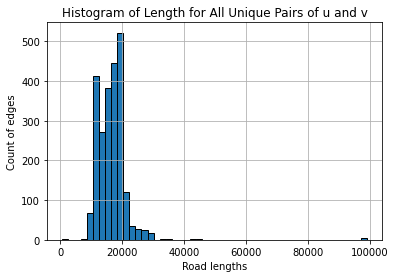

In [21]:
import matplotlib.pyplot as plt

# Get all unique pairs of 'u' and 'v' columns in the DataFrame
pairs_hist = df[['u', 'v']].drop_duplicates().values.tolist()

# Concatenate the length column from all subset DataFrames into a single DataFrame
lengths = pd.concat([df[(df['u'] == u) & (df['v'] == v)]['length'] for u, v in pairs_hist])

# Create a histogram of the concatenated length column
lengths.hist(bins=50, edgecolor='black')
plt.xlabel('Road lengths')
plt.ylabel('Count of edges')
plt.title('Histogram of Length for All Unique Pairs of u and v')
plt.show()



In [22]:
# Get all unique pairs of 'u' and 'v' columns in the DataFrame
pairs_hist = df[['u', 'v']].drop_duplicates().values.tolist()

# Initialize a Boolean variable to keep track of whether any pairs have a length less than 10000
has_short_pairs = False

# Iterate over all unique pairs
for u, v in pairs_hist:
    # Subset the DataFrame to the rows corresponding to this unique pair
    subset_df = df[(df['u'] == u) & (df['v'] == v)]
    # Check if the length column has any values less than 10000
    if (subset_df['length'] < 10000).any():
        has_short_pairs = True
        print(f'Pair {u}-{v} has a length less than 10000')

# Check if any pairs have a length less than 10000
if not has_short_pairs:
    print('All pairs have a length of 10000 or more')


Pair 298536-1220613 has a length less than 10000
Pair 1095954-1007500 has a length less than 10000


In [23]:
# Get all unique pairs of 'u' and 'v' columns in the DataFrame
pairs = df[['u', 'v']].drop_duplicates().values.tolist()

# Initialize a variable to keep track of the count of pairs with length less than 10000
short_pairs_count = 0

# Iterate over all unique pairs
for u, v in pairs:
    # Subset the DataFrame to the rows corresponding to this unique pair
    subset_df = df[(df['u'] == u) & (df['v'] == v)]
    # Check if the length column has any values less than 10000
    if (subset_df['length'] < 10000).any():
        short_pairs_count += 1

# Print the count of unique pairs with length less than 10000
print(f'The count of unique pairs with length less than 10000 is {short_pairs_count}')


The count of unique pairs with length less than 10000 is 2


In [24]:
#Demand per hour if we divide cars charging evenly across all hours of the day

# Create a list of the columns to use
columns_to_use = ['u', 'v', 'charge_cars_jan', 'charge_cars_feb', 'charge_cars_mar', 'charge_cars_apr', 'charge_cars_may', 'charge_cars_jun', 'charge_cars_jul', 'charge_cars_aug', 'charge_cars_sep', 'charge_cars_oct', 'charge_cars_nov', 'charge_cars_dec']

# Create a new DataFrame with the selected columns
new_df = df[columns_to_use].copy()

# Define a function to calculate the number of cars required for each charging station per hour for a given month
def cars_per_hour_month(row, month):
    return row[f'charge_cars_{month}'] / 24

# Iterate over each month and apply the function to each row of the DataFrame for that month
for month in ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']:
    new_df[f'per_hour_{month}'] = new_df.apply(cars_per_hour_month, axis=1, args=(month,))





In [ ]:
new_df.head()


# demand_per_hour=new_df

In [26]:
#Demand per hour if we divide car charging by hours 06:00 to 22:00 of the day

# Create a list of the columns to use
columns_to_use = ['u', 'v', 'charge_cars_jan', 'charge_cars_feb', 'charge_cars_mar', 'charge_cars_apr', 'charge_cars_may', 'charge_cars_jun', 'charge_cars_jul', 'charge_cars_aug', 'charge_cars_sep', 'charge_cars_oct', 'charge_cars_nov', 'charge_cars_dec']

# Create a new DataFrame with the selected columns
new_df = df[columns_to_use].copy()

# Define a function to calculate the number of cars required for each charging station per hour for a given month
def cars_per_hour_month(row, month):
    return row[f'charge_cars_{month}'] / 24

# Iterate over each month and apply the function to each row of the DataFrame for that month
for month in ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']:
    new_df[f'per_hour_{month}'] = new_df.apply(cars_per_hour_month, axis=1, args=(month,))



In [ ]:
df.head()

In [28]:
import pandas as pd
#Investigating real traffic hourly patterns of the day based on real data (not pivoted spreadsheet)
hourly=pd.read_csv(r"C:\Users\anton\Desktop\Master-Oppgave\Anton\Kode\All_Roads\CSV\calculatin_mean_traveltimes.csv")

hourly.head()

,traffic_point_id,year,month,day,from_hour,to_hour,volume
0,65823V1668921,2018,9,17,00:00,01:00,20
1,65823V1668921,2018,9,17,01:00,02:00,6
2,65823V1668921,2018,9,17,02:00,03:00,1
3,65823V1668921,2018,9,17,03:00,04:00,0
4,65823V1668921,2018,9,17,04:00,05:00,4


In [29]:
# Group the DataFrame by hour and sum the traffic volume
total_traffic_by_hour = hourly.groupby(['from_hour'])['volume'].sum()

# Calculate the total traffic volume for the entire day
total_traffic = hourly['volume'].sum()

# Calculate the mean ratio for each hour of the day
mean_ratios = total_traffic_by_hour / total_traffic


In [30]:
mean_ratios

from_hour
00:00   0.00669
01:00   0.00434
02:00   0.00326
03:00   0.00301
04:00   0.00405
05:00   0.01132
06:00   0.03877
07:00   0.06153
08:00   0.05672
09:00   0.04802
10:00   0.05183
11:00   0.05845
12:00   0.06270
13:00   0.06763
14:00   0.07650
15:00   0.09013
16:00   0.08230
17:00   0.06870
18:00   0.05882
19:00   0.04920
20:00   0.03833
21:00   0.02800
22:00   0.01943
23:00   0.01025
Name: volume, dtype: float64

C:\Users\anton\AppData\Local\Temp/ipykernel_20392/322800846.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_smooth, y_smooth, 'r-', color="darkred", lw=2)


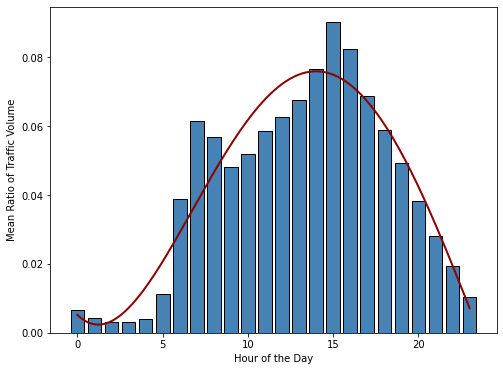

In [31]:
from scipy.interpolate import make_interp_spline, UnivariateSpline
import numpy as np
import matplotlib.pyplot as plt

# Convert the mean ratios to a list
mean_ratios_list = mean_ratios.tolist()

# Create a list of the hour values
hours = mean_ratios.index.tolist()

# # Extract just the hour from the from_hour column
# hours = [x.split(':')[0] for x in hours]

# Extract just the hour from the from_hour column
hours = [int(x.split(':')[0]) for x in hours]  # Convert to integers

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the histogram
ax.bar(hours, mean_ratios_list, edgecolor='black', color="steelblue")

# Set the x-axis label
ax.set_xlabel('Hour of the Day')

# Set the y-axis label
ax.set_ylabel('Mean Ratio of Traffic Volume')

# Generate the spline
x_smooth = np.linspace(min(hours), max(hours), 200)
#spl = make_interp_spline(hours, mean_ratios_list, k=3)  #Smoothing method 1 : more precise (less nice)
spl = UnivariateSpline(hours, mean_ratios_list, k=4, s=1)  # Smoothing method 2 : less precise, more smooth (more nice)
y_smooth = spl(x_smooth)
# Add the spline to the plot
ax.plot(x_smooth, y_smooth, 'r-', color="darkred", lw=2)

# Show the plot
plt.show()


## In order to calculate supply from charging stations, data needs another format

In [32]:
import pandas as pd
import json
from json import JSONEncoder
import ast


class CustomJSONEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, pd.core.series.Series):
            return obj.tolist()
        return super(CustomJSONEncoder, self).default(obj)

# Assuming your dataframe is called 'df'
charging_cols = ['u', 'v', 'CS_id', 'PowerKW_list', 'Number_Of_Chargers', 'Name']

# Create a new DataFrame with the selected columns
cs_data = df[charging_cols].copy()
# Initialize an empty dictionary to store the data
data_dict = {}

# Iterate through the dataframe rows
for index, row in cs_data.iterrows():
    # Create a key for the unique combination of 'u' and 'v'
    key = f"{row['u']}_{row['v']}"

    # If the key is not in the dictionary, create a new entry
    if key not in data_dict:
        data_dict[key] = {'CS_ids': [], 'PowerKW_lists': []}

    # Append the CS_id and PowerKW_list for the current row to the corresponding lists
    data_dict[key]['CS_ids'].append(row['CS_id'])
    if row['PowerKW_list'] == "No CS":
        data_dict[key]['PowerKW_lists'].append("No CS")
    else:
        data_dict[key]['PowerKW_lists'].append([float(x) for x in ast.literal_eval(row['PowerKW_list'])])
# Convert the dictionary to a JSON object
json_data = json.dumps(data_dict, indent=2, cls=CustomJSONEncoder)

# Print the JSON object
print(json_data)


{
  "794436_735703": {
    "CS_ids": [
      243271,
      215792,
      243223,
      243329,
      173544,
      157375,
      243244,
      243232,
      243271,
      215792,
      243223,
      243329,
      173544,
      157375,
      243244,
      243232,
      243271,
      215792,
      243223,
      243329,
      173544,
      157375,
      243244,
      243232,
      243271,
      215792,
      243223,
      243329,
      173544,
      157375,
      243244,
      243232,
      243271,
      215792,
      243223,
      243329,
      173544,
      157375,
      243244,
      243232,
      243271,
      215792,
      243223,
      243329,
      173544,
      157375,
      243244,
      243232,
      243271,
      215792,
      243223,
      243329,
      173544,
      157375,
      243244,
      243232,
      243271,
      215792,
      243223,
      243329,
      173544,
      157375,
      243244,
      243232,
      243271,
      215792,
      243223,
      243329,
      173

In [33]:
# assume `json_str` contains your JSON formatted string
with open('edge_cs_data.json', 'w') as f:
    f.write(json_data)

In [34]:
#Filter out chargers with less than or equal to 25 in PowerKW.

import json

# Load the JSON data
with open('edge_cs_data.json') as f:
    data = json.load(f)

# Iterate through each element of the PowerKW_lists arrays
for key, value in data.items():
    for i, lst in enumerate(value['PowerKW_lists']):
        # Use a list comprehension to filter out the values that are equal to 22
        filtered_lst = [x for x in lst if x not in [22.0, 25.0]]
        # Replace the original list with the filtered list
        value['PowerKW_lists'][i] = filtered_lst

# Save the updated JSON data
with open('updated_json_file.json', 'w') as f:
    json.dump(data, f, indent=2)


In [35]:
#Dictionary containing the amount of cars that can charge per hour at chargers with different capacities (data from Excel spreadsheet)

#Set-Up time not accounted for
# cars_per_hour_dict = {
#     350.0: 5.147,
#     300.0: 4.412,
#     250.0: 3.676,
#     200.0: 2.941,
#     180.0: 2.647,
#     175.0: 2.574,
#     150.0: 2.206,
#     135.0: 1.985,
#     129.0: 1.897,
#     125.0: 1.838,
#     120.0: 1.765,
#     100.0: 1.471,
#     75.0: 1.103,
#     62.5: 0.919,
#     62.0: 0.912,
#     60.0: 0.882,
#     55.0: 0.809,
#     48.0: 0.706,
#     44.0: 0.647,
#     43.0: 0.632
# }

#Set-Up time accounted for (10%)
cars_per_hour_dict={
    350: 4.6,
    300: 4.0,
    250: 3.3,
    200: 2.6,
    180: 2.4,
    175: 2.3,
    150: 2.0,
    135: 1.8,
    129: 1.7,
    125: 1.7,
    120: 1.6,
    100: 1.3,
    75: 1.0,
    62.5: 0.8,
    62: 0.8,
    60: 0.8,
    55: 0.7,
    50: 0.7,
    48: 0.6,
    44: 0.6,
    43: 0.6
}


In [36]:
import json
import pandas as pd

# Load the updated JSON data
with open('updated_json_file.json') as f:
    python_data = json.load(f)

# Create an empty list to hold the calculated values
calc_values = []

# Loop over each ID in the Python object
for id_, values in python_data.items():
    # Skip the iteration if either "CS_ids" or "PowerKW_lists" keys have invalid values
    if not values['CS_ids'] or not all(isinstance(power, (float, int)) for power_list in values['PowerKW_lists'] for power in power_list):
        continue
    # Calculate the total capacity for the ID by summing the capacities in the "PowerKW_lists" key
    total_capacity = sum([sum([cars_per_hour_dict[power] for power in power_list]) for power_list in values['PowerKW_lists']])
    
    # Append the ID and calculated value to the list
    calc_values.append((id_, total_capacity))

# Create a DataFrame from the list of calculated values
edge_supply = pd.DataFrame(calc_values, columns=['ID', 'CalcValue'])

# Print the DataFrame
print(edge_supply)

                 ID  CalcValue
0     794436_735703  379.00000
1    794436_1394577  246.60000
2    794436_1613461   86.40000
3    794436_1337200   64.80000
4     794436_492484   64.80000
..              ...        ...
417   973673_987955    2.70000
418   988264_974905    0.00000
419   974905_975169    0.00000
420  973930_1818925    0.00000
421  1818925_832749    2.70000

[422 rows x 2 columns]


In [37]:
edge_supply = edge_supply.rename(columns={'ID': 'new_id'})


In [38]:
df["new_id"] = df["u"].astype(str) + "_" + df["v"].astype(str)


In [39]:
df.head()

,u,v,length,traffic_id,volume,Name,CS_id,geometry,Level,PowerKW_list,Number_Of_Chargers,vol_jan,vol_feb,vol_mar,vol_apr,vol_may,vol_jun,vol_jul,vol_aug,vol_sep,vol_oct,vol_nov,vol_dec,range,actual_range_jan,actual_range_feb,actual_range_mar,actual_range_apr,actual_range_may,actual_range_jun,actual_range_jul,actual_range_aug,actual_range_sep,actual_range_oct,actual_range_nov,actual_range_dec,charge_prob_jan,charge_prob_feb,charge_prob_mar,charge_prob_apr,charge_prob_may,charge_prob_jun,charge_prob_jul,charge_prob_aug,charge_prob_sep,charge_prob_oct,charge_prob_nov,charge_prob_dec,charge_cars_jan,charge_cars_feb,charge_cars_mar,charge_cars_apr,charge_cars_may,charge_cars_jun,charge_cars_jul,charge_cars_aug,charge_cars_sep,charge_cars_oct,charge_cars_nov,charge_cars_dec,new_id
0,794436,735703,11865.76308,59192V1878201,34276,Frydenlund P-hus,243271,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22....",15,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,101,105,103,100,89,94,65,83,88,100,111,100,794436_735703
1,794436,735703,11865.76308,59192V1878201,34276,Tjuvholmen Parkering,215792,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22....",15,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,101,105,103,100,89,94,65,83,88,100,111,100,794436_735703
2,794436,735703,11865.76308,59192V1878201,34276,"Recharge Filipstad, Oslo",243223,LINESTRING (10.733792828475945 59.909993840978...,3,"[50.0, 150.0, 50.0, 150.0, 50.0, 150.0, 50.0, ...",16,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,101,105,103,100,89,94,65,83,88,100,111,100,794436_735703
3,794436,735703,11865.76308,59192V1878201,34276,Recharge K89,243329,LINESTRING (10.733792828475945 59.909993840978...,3,"[50.0, 50.0, 50.0, 50.0, 22.0, 22.0, 22.0, 22....",11,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,101,105,103,100,89,94,65,83,88,100,111,100,794436_735703
4,794436,735703,11865.76308,59192V1878201,34276,Idas vei,173544,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]",8,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,101,105,103,100,89,94,65,83,88,100,111,100,794436_735703


In [40]:
# Assuming the other dataframe is called "other_df"
merged_df = df.merge(edge_supply, on='new_id')


In [41]:
merged_df.head()

,u,v,length,traffic_id,volume,Name,CS_id,geometry,Level,PowerKW_list,Number_Of_Chargers,vol_jan,vol_feb,vol_mar,vol_apr,vol_may,vol_jun,vol_jul,vol_aug,vol_sep,vol_oct,vol_nov,vol_dec,range,actual_range_jan,actual_range_feb,actual_range_mar,actual_range_apr,actual_range_may,actual_range_jun,actual_range_jul,actual_range_aug,actual_range_sep,actual_range_oct,actual_range_nov,actual_range_dec,charge_prob_jan,charge_prob_feb,charge_prob_mar,charge_prob_apr,charge_prob_may,charge_prob_jun,charge_prob_jul,charge_prob_aug,charge_prob_sep,charge_prob_oct,charge_prob_nov,charge_prob_dec,charge_cars_jan,charge_cars_feb,charge_cars_mar,charge_cars_apr,charge_cars_may,charge_cars_jun,charge_cars_jul,charge_cars_aug,charge_cars_sep,charge_cars_oct,charge_cars_nov,charge_cars_dec,new_id,CalcValue
0,794436,735703,11865.76308,59192V1878201,34276,Frydenlund P-hus,243271,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22....",15,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,101,105,103,100,89,94,65,83,88,100,111,100,794436_735703,379.00000
1,794436,735703,11865.76308,59192V1878201,34276,Tjuvholmen Parkering,215792,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22....",15,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,101,105,103,100,89,94,65,83,88,100,111,100,794436_735703,379.00000
2,794436,735703,11865.76308,59192V1878201,34276,"Recharge Filipstad, Oslo",243223,LINESTRING (10.733792828475945 59.909993840978...,3,"[50.0, 150.0, 50.0, 150.0, 50.0, 150.0, 50.0, ...",16,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,101,105,103,100,89,94,65,83,88,100,111,100,794436_735703,379.00000
3,794436,735703,11865.76308,59192V1878201,34276,Recharge K89,243329,LINESTRING (10.733792828475945 59.909993840978...,3,"[50.0, 50.0, 50.0, 50.0, 22.0, 22.0, 22.0, 22....",11,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,101,105,103,100,89,94,65,83,88,100,111,100,794436_735703,379.00000
4,794436,735703,11865.76308,59192V1878201,34276,Idas vei,173544,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]",8,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,101,105,103,100,89,94,65,83,88,100,111,100,794436_735703,379.00000


In [42]:
merged_df = merged_df.rename(columns={'CalcValue': 'Charge_Supply'})

unique_counts = merged_df['Charge_Supply'].value_counts()
unique_values = unique_counts.index.tolist()
occurrences = unique_counts.tolist()

for i in range(len(unique_values)):
    print("Value: {}, Occurrences: {}".format(unique_values[i], occurrences[i]))


Value: 0.0, Occurrences: 98
Value: 379.0000000000001, Occurrences: 80
Value: 246.6, Occurrences: 72
Value: 489.6, Occurrences: 64
Value: 1.4, Occurrences: 62
Value: 2.8, Occurrences: 55
Value: 334.00000000000017, Occurrences: 50
Value: 187.19999999999996, Occurrences: 48
Value: 709.2, Occurrences: 45
Value: 305.1, Occurrences: 45
Value: 18.9, Occurrences: 42
Value: 5.6, Occurrences: 41
Value: 624.0000000000001, Occurrences: 40
Value: 131.49999999999997, Occurrences: 40
Value: 4.199999999999999, Occurrences: 40
Value: 190.00000000000003, Occurrences: 35
Value: 64.8, Occurrences: 30
Value: 233.99999999999994, Occurrences: 30
Value: 75.6, Occurrences: 30
Value: 112.8, Occurrences: 30
Value: 57.599999999999994, Occurrences: 28
Value: 61.80000000000001, Occurrences: 24
Value: 99.99999999999999, Occurrences: 24
Value: 110.39999999999998, Occurrences: 24
Value: 130.4, Occurrences: 24
Value: 33.39999999999999, Occurrences: 22
Value: 8.0, Occurrences: 21
Value: 114.09999999999998, Occurrences: 

In [43]:
#New dataframe creation which excludes duplicates rows (results in as many rows as edges)
every_edge= merged_df.drop_duplicates(subset='new_id', keep='first')

every_edge.head()


,u,v,length,traffic_id,volume,Name,CS_id,geometry,Level,PowerKW_list,Number_Of_Chargers,vol_jan,vol_feb,vol_mar,vol_apr,vol_may,vol_jun,vol_jul,vol_aug,vol_sep,vol_oct,vol_nov,vol_dec,range,actual_range_jan,actual_range_feb,actual_range_mar,actual_range_apr,actual_range_may,actual_range_jun,actual_range_jul,actual_range_aug,actual_range_sep,actual_range_oct,actual_range_nov,actual_range_dec,charge_prob_jan,charge_prob_feb,charge_prob_mar,charge_prob_apr,charge_prob_may,charge_prob_jun,charge_prob_jul,charge_prob_aug,charge_prob_sep,charge_prob_oct,charge_prob_nov,charge_prob_dec,charge_cars_jan,charge_cars_feb,charge_cars_mar,charge_cars_apr,charge_cars_may,charge_cars_jun,charge_cars_jul,charge_cars_aug,charge_cars_sep,charge_cars_oct,charge_cars_nov,charge_cars_dec,new_id,Charge_Supply
0,794436,735703,11865.76308,59192V1878201,34276,Frydenlund P-hus,243271,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22....",15,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,101,105,103,100,89,94,65,83,88,100,111,100,794436_735703,379.00000
80,794436,1394577,18400.11225,87255V443880,4576,Frydenlund P-hus,243271,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22....",15,4576,4407,4337,5022,5410,5680,3375,5100,5232,5105,5178,4431,300,240,240,240,270,300,315,330,330,306,276,245,240,0.07667,0.07667,0.07667,0.06815,0.06133,0.05841,0.05576,0.05576,0.06013,0.06667,0.07480,0.07667,21,20,19,20,19,19,11,17,18,20,23,20,794436_1394577,246.60000
152,794436,1613461,12795.37215,59192V1878201,34276,Frydenlund P-hus,243271,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22....",15,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.05331,0.05331,0.05331,0.04739,0.04265,0.04062,0.03877,0.03877,0.04181,0.04636,0.05201,0.05331,109,113,112,108,96,101,70,89,95,108,120,108,794436_1613461,86.40000
172,794436,1337200,18742.34607,59192V1878201,34276,Recharge Solli P-Hus,243244,LINESTRING (10.733792828475945 59.909993840978...,3,[22.0],1,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.07809,0.07809,0.07809,0.06942,0.06247,0.05950,0.05679,0.05679,0.06125,0.06791,0.07619,0.07809,160,166,164,158,141,148,102,131,140,159,176,158,794436_1337200,64.80000
187,794436,492484,20506.42291,64557V625518,13254,Frydenlund P-hus,243271,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22....",15,13254,13899,13204,14454,14290,15631,11172,14120,13877,13363,14288,12858,300,240,240,240,270,300,315,330,330,306,276,245,240,0.08544,0.08544,0.08544,0.07595,0.06835,0.06510,0.06214,0.06214,0.06701,0.07430,0.08336,0.08544,67,71,67,65,58,61,41,52,55,59,71,65,794436_492484,64.80000


## Now, we will start comparing supply and demand

In [44]:
import pandas as pd

# Helper function to distribute the cars per edge using the mean_ratios
def distribute_cars(cars, mean_ratios):
    return [cars * ratio for ratio in mean_ratios]

# Extract hour ratios from mean_ratios
hour_ratios = mean_ratios.values.tolist()


# Prepare a list of month abbreviations
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Initialize an empty dictionary to store the DataFrames for each month
monthly_dfs = {}

# Iterate over each month
for month in months:
    # Create a new DataFrame with the same index as new_df
    monthly_df = every_edge[['u', 'v']].copy()
    
    # Distribute cars for each edge and each hour of the day
    for hour, ratio in enumerate(hour_ratios):
        hourly_column_name = f'hour_{hour:02d}_{month}'
        monthly_df[hourly_column_name] = every_edge[f'charge_cars_{month}'].mul(ratio)


    
    # Store the resulting DataFrame in the dictionary
    monthly_dfs[month] = monthly_df


In [42]:
monthly_dfs

{'jan':             u        v  hour_00_jan  hour_01_jan  hour_02_jan  hour_03_jan  \
 0      794436   735703      0.67610      0.43813      0.32945      0.30381   
 80     794436  1394577      0.14058      0.09110      0.06850      0.06317   
 152    794436  1613461      0.72966      0.47284      0.35554      0.32788   
 172    794436  1337200      1.07106      0.69407      0.52190      0.48129   
 187    794436   492484      0.44850      0.29064      0.21855      0.20154   
 ...       ...      ...          ...          ...          ...          ...   
 2019   973673   987955      0.00669      0.00434      0.00326      0.00301   
 2020   988264   974905      0.00669      0.00434      0.00326      0.00301   
 2021   974905   975169      0.00669      0.00434      0.00326      0.00301   
 2022   973930  1818925      0.00000      0.00000      0.00000      0.00000   
 2023  1818925   832749      0.00669      0.00434      0.00326      0.00301   
 
       hour_04_jan  hour_05_jan  hour_06_ja

### Compare the hourly demand of charging to the fixed supply of charge per edge per hour per month 

In [45]:

# Initialize an empty dictionary to store the DataFrames for each month
supply_demand_difference = {}

# Iterate over each month
for month in months:
    # Get the corresponding DataFrame for the month
    monthly_df = monthly_dfs[month].copy()
    
    # Iterate over each hour of the day
    for hour in range(24):
        hourly_column_name = f'hour_{hour:02d}_{month}'
        
        # Calculate the supply-demand difference for each hour
        supply_demand_difference_hour = every_edge['Charge_Supply'] - monthly_df[hourly_column_name]
        
        # Replace the hourly column with the supply-demand difference
        diff_hourly_column_name = f'diff_hour_{hour:02d}_{month}'
        monthly_df[diff_hourly_column_name] = supply_demand_difference_hour

        # Drop the original hourly column
        monthly_df = monthly_df.drop(hourly_column_name, axis=1)
    
    # Store the resulting DataFrame in the dictionary
    supply_demand_difference[month] = monthly_df


In [46]:
print(supply_demand_difference['jan'])


            u        v  diff_hour_00_jan  diff_hour_01_jan  diff_hour_02_jan  \
0      794436   735703         378.32390         378.56187         378.67055   
80     794436  1394577         246.45942         246.50890         246.53150   
152    794436  1613461          85.67034          85.92716          86.04446   
172    794436  1337200          63.72894          64.10593          64.27810   
187    794436   492484          64.35150          64.50936          64.58145   
...       ...      ...               ...               ...               ...   
2019   973673   987955           2.69331           2.69566           2.69674   
2020   988264   974905          -0.00669          -0.00434          -0.00326   
2021   974905   975169          -0.00669          -0.00434          -0.00326   
2022   973930  1818925           0.00000           0.00000           0.00000   
2023  1818925   832749           2.69331           2.69566           2.69674   

      diff_hour_03_jan  diff_hour_04_ja

In [45]:
output_filename = "supply_demand_difference_january.xlsx"

# Get the DataFrame for January from the supply_demand_difference dictionary
january_df = supply_demand_difference["jan"]

# Export the DataFrame to an Excel file
january_df.to_excel(output_filename, engine="openpyxl", index=False)


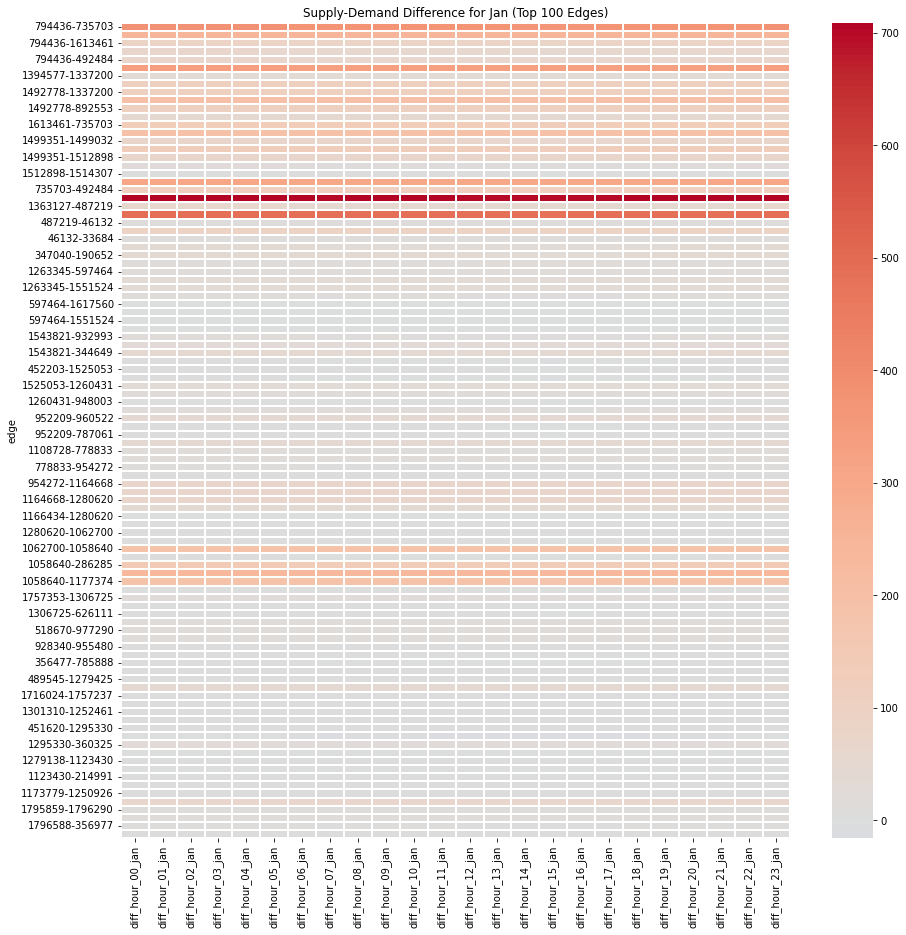

In [47]:
#Visualizations of data
import seaborn as sns
import matplotlib.pyplot as plt

# Choose the month you want to visualize
month = "jan"

# Prepare the data for the heatmap
data_to_plot = supply_demand_difference[month].drop(["u", "v"], axis=1)

# Pivot the data so that rows represent edges and columns represent hours
data_to_plot["edge"] = supply_demand_difference[month][["u", "v"]].apply(lambda x: f"{x[0]}-{x[1]}", axis=1)
data_to_plot = data_to_plot.set_index("edge")

# Number of rows to display
num_rows = 100

# Set the figure size
plt.figure(figsize=(15, 15))

# Create the heatmap
sns.heatmap(data_to_plot.head(num_rows), cmap="coolwarm", center=0, linewidths=0.1, linecolor="white")

# Add a title to the plot
plt.title(f"Supply-Demand Difference for {month.capitalize()} (Top {num_rows} Edges)")

# Show the plot
plt.show()



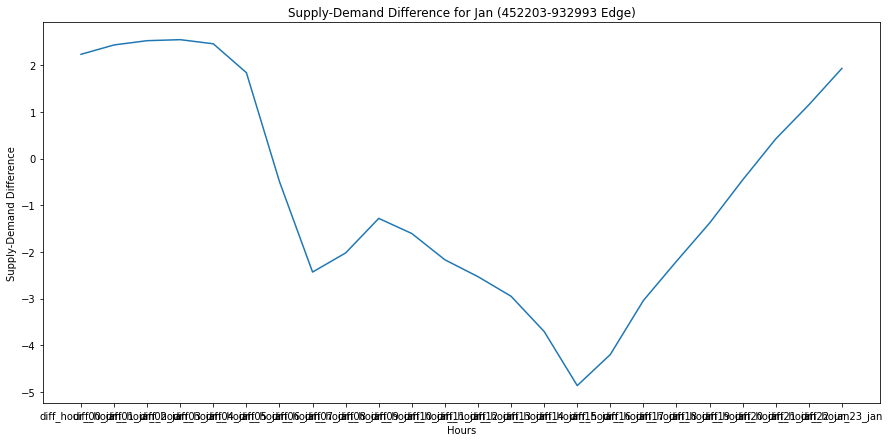

In [48]:
import matplotlib.pyplot as plt

# Choose the month you want to visualize
month = "jan"

# Choose the specific edge (u, v) you want to visualize
selected_u = 452203
selected_v = 932993


# Prepare the data for the line chart
edge_data = supply_demand_difference[month].query("u == @selected_u and v == @selected_v")
edge_data = edge_data.drop(["u", "v"], axis=1).T

# Set the figure size
plt.figure(figsize=(15, 7))

# Create the line chart
plt.plot(edge_data.index, edge_data.values)

# Add labels and a title to the plot
plt.xlabel("Hours")
plt.ylabel("Supply-Demand Difference")
plt.title(f"Supply-Demand Difference for {month.capitalize()} ({selected_u}-{selected_v} Edge)")

# Show the plot
plt.show()
 #Wrong

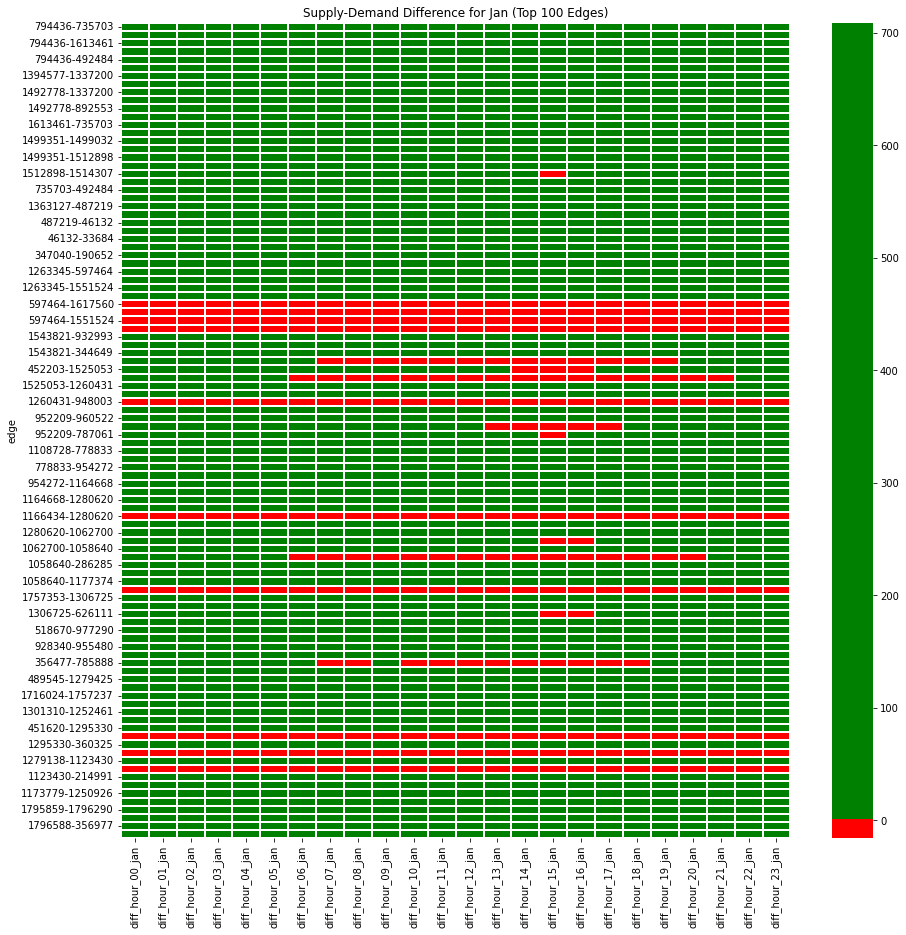

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Choose the month you want to visualize
month = "jan"

# Prepare the data for the heatmap
data_to_plot = supply_demand_difference[month].drop(["u", "v"], axis=1)

# Pivot the data so that rows represent edges and columns represent hours
data_to_plot["edge"] = supply_demand_difference[month][["u", "v"]].apply(lambda x: f"{x[0]}-{x[1]}", axis=1)
data_to_plot = data_to_plot.set_index("edge")

# Number of rows to display
num_rows = 100

# Set the figure size
plt.figure(figsize=(15, 15))

# Create custom colormap for the heatmap
custom_cmap = ListedColormap(['red', 'green'])

# Create the heatmap with custom colormap and center at 0
sns.heatmap(data_to_plot.head(num_rows), cmap=custom_cmap, center=0, linewidths=0.1, linecolor="white")

# Add a title to the plot
plt.title(f"Supply-Demand Difference for {month.capitalize()} (Top {num_rows} Edges)")

# Show the plot
plt.show()


## Categorizing edges by being served, partially served or underserved

In [50]:
# Select the supply-demand difference DataFrame for January
january_df = supply_demand_difference["jan"].copy()

# Create a new DataFrame to store the classification
classification_df = pd.DataFrame(index=january_df.index, columns=["edge_classification"])

# Iterate over the edges
for edge in january_df.index:
    # Get the supply-demand difference values for the edge
    diff_values = january_df.loc[edge][2:]
    
    # Check if all values are positive
    if (diff_values > 0).all():
        classification = 1
    # Check if all values are negative
    elif (diff_values < 0).all():
        classification = -1
    # Otherwise, the values are mixed
    else:
        classification = 0
    
    # Store the classification for the edge
    classification_df.loc[edge, "edge_classification"] = classification

# Merge the classification DataFrame with the original DataFrame
january_df = pd.concat([january_df, classification_df], axis=1)

# Display the updated DataFrame
january_df.head()


,u,v,diff_hour_00_jan,diff_hour_01_jan,diff_hour_02_jan,diff_hour_03_jan,diff_hour_04_jan,diff_hour_05_jan,diff_hour_06_jan,diff_hour_07_jan,diff_hour_08_jan,diff_hour_09_jan,diff_hour_10_jan,diff_hour_11_jan,diff_hour_12_jan,diff_hour_13_jan,diff_hour_14_jan,diff_hour_15_jan,diff_hour_16_jan,diff_hour_17_jan,diff_hour_18_jan,diff_hour_19_jan,diff_hour_20_jan,diff_hour_21_jan,diff_hour_22_jan,diff_hour_23_jan,edge_classification
0,794436,735703,378.32390,378.56187,378.67055,378.69619,378.59113,377.85622,375.08432,372.78504,373.27114,374.14979,373.76475,373.09674,372.66754,372.16910,371.27303,369.89647,370.68728,372.06121,373.05952,374.03078,375.12855,376.17161,377.03803,377.96524,1
80,794436,1394577,246.45942,246.50890,246.53150,246.53683,246.51499,246.36218,245.78585,245.30778,245.40885,245.59154,245.51148,245.37259,245.28335,245.17971,244.99340,244.70719,244.87161,245.15728,245.36485,245.56680,245.79505,246.01192,246.19206,246.38485,1
152,794436,1613461,85.67034,85.92716,86.04446,86.07212,85.95875,85.16562,82.17417,79.69276,80.21736,81.16562,80.75008,80.02916,79.56596,79.02804,78.06099,76.57540,77.42884,78.91160,79.98899,81.03718,82.22190,83.34758,84.28262,85.28328,1
172,794436,1337200,63.72894,64.10593,64.27810,64.31871,64.15229,62.98807,58.59695,54.95452,55.72457,57.11650,56.50654,55.44831,54.76839,53.97878,52.55926,50.37857,51.63133,53.80786,55.38934,56.92797,58.66702,60.31939,61.69192,63.16077,1
187,794436,492484,64.35150,64.50936,64.58145,64.59846,64.52877,64.04125,62.20247,60.67720,60.99966,61.58254,61.32711,60.88398,60.59926,60.26861,59.67419,58.76102,59.28562,60.19704,60.85928,61.50359,62.23181,62.92374,63.49849,64.11357,1


In [51]:
# Filter the rows where edge_classification is equal to 0 or -1
underserved_edges = january_df.loc[january_df["edge_classification"].isin([0, -1])]

# Display the underserved edges
print(underserved_edges)


            u        v  diff_hour_00_jan  diff_hour_01_jan  diff_hour_02_jan  \
655    597464  1617560          -0.12719          -0.08242          -0.06198   
656    597464  1063277          -0.14727          -0.09544          -0.07176   
658    597464  1551524          -0.12049          -0.07808          -0.05871   
659    597464   294323          -0.26107          -0.16918          -0.12721   
676    452203   868805           4.81679           5.09246           5.21836   
...       ...      ...               ...               ...               ...   
2011  1011905  1118608          -0.26776          -0.17352          -0.13048   
2013   983298   983856          -0.03347          -0.02169          -0.01631   
2020   988264   974905          -0.00669          -0.00434          -0.00326   
2021   974905   975169          -0.00669          -0.00434          -0.00326   
2022   973930  1818925           0.00000           0.00000           0.00000   

      diff_hour_03_jan  diff_hour_04_ja

In [52]:
#Make ID for dataframe so that we can join the geometry and make it QGIS compatible

january_df["new_id"] = january_df["u"].astype(str) + "_" + january_df["v"].astype(str)

# Merge january_df_subset with every_edge on the new_id column
qgis_com_jan = january_df.merge(every_edge[['new_id','geometry']], on='new_id')


In [53]:
qgis_com_jan.head()

,u,v,diff_hour_00_jan,diff_hour_01_jan,diff_hour_02_jan,diff_hour_03_jan,diff_hour_04_jan,diff_hour_05_jan,diff_hour_06_jan,diff_hour_07_jan,diff_hour_08_jan,diff_hour_09_jan,diff_hour_10_jan,diff_hour_11_jan,diff_hour_12_jan,diff_hour_13_jan,diff_hour_14_jan,diff_hour_15_jan,diff_hour_16_jan,diff_hour_17_jan,diff_hour_18_jan,diff_hour_19_jan,diff_hour_20_jan,diff_hour_21_jan,diff_hour_22_jan,diff_hour_23_jan,edge_classification,new_id,geometry
0,794436,735703,378.32390,378.56187,378.67055,378.69619,378.59113,377.85622,375.08432,372.78504,373.27114,374.14979,373.76475,373.09674,372.66754,372.16910,371.27303,369.89647,370.68728,372.06121,373.05952,374.03078,375.12855,376.17161,377.03803,377.96524,1,794436_735703,LINESTRING (10.733792828475945 59.909993840978...
1,794436,1394577,246.45942,246.50890,246.53150,246.53683,246.51499,246.36218,245.78585,245.30778,245.40885,245.59154,245.51148,245.37259,245.28335,245.17971,244.99340,244.70719,244.87161,245.15728,245.36485,245.56680,245.79505,246.01192,246.19206,246.38485,1,794436_1394577,LINESTRING (10.733792828475945 59.909993840978...
2,794436,1613461,85.67034,85.92716,86.04446,86.07212,85.95875,85.16562,82.17417,79.69276,80.21736,81.16562,80.75008,80.02916,79.56596,79.02804,78.06099,76.57540,77.42884,78.91160,79.98899,81.03718,82.22190,83.34758,84.28262,85.28328,1,794436_1613461,LINESTRING (10.733792828475945 59.909993840978...
3,794436,1337200,63.72894,64.10593,64.27810,64.31871,64.15229,62.98807,58.59695,54.95452,55.72457,57.11650,56.50654,55.44831,54.76839,53.97878,52.55926,50.37857,51.63133,53.80786,55.38934,56.92797,58.66702,60.31939,61.69192,63.16077,1,794436_1337200,LINESTRING (10.733792828475945 59.909993840978...
4,794436,492484,64.35150,64.50936,64.58145,64.59846,64.52877,64.04125,62.20247,60.67720,60.99966,61.58254,61.32711,60.88398,60.59926,60.26861,59.67419,58.76102,59.28562,60.19704,60.85928,61.50359,62.23181,62.92374,63.49849,64.11357,1,794436_492484,LINESTRING (10.733792828475945 59.909993840978...


In [115]:
qgis_com_jan.to_csv("identify_january.csv")